In [0]:
import numpy as np
import torch
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.determenistic = True

In [0]:
import torchvision.datasets
mnist_train = torchvision.datasets.MNIST('./', download = True, train = True)
mnist_test = torchvision.datasets.MNIST('./', download = True, train = False)

In [0]:
x_train = mnist_train.data
x_test = mnist_test.data
y_train = mnist_train.targets
y_test = mnist_test.targets

In [0]:
x_train = x_train.float()
x_test = x_test.float()

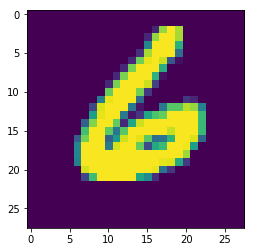

In [47]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1327, :, :])
plt.show()

In [0]:
x_train = x_train.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

In [49]:
x_train.reshape([-1, 28 * 28]).shape

torch.Size([60000, 784])

In [0]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [51]:
torch.cuda.is_available()

True

In [52]:
!nvidia-smi

Wed Aug 14 10:41:10 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |   1045MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
         -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
         -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
          2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
          2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
          2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
          2.3455e-02, -2

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), 1e-3)

In [55]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(x_train))
  
  for idx in range(0, len(x_train), batch_size):
    optimizer.zero_grad()
    
    batch_idx = order[idx:idx + batch_size]
    
    x_batch = x_train[batch_idx].to(device)
    y_batch = y_train[batch_idx].to(device)
    
    pred = mnist_net.forward(x_batch)
    loss_val = loss(pred, y_batch)
    
    loss_val.backward()
    optimizer.step()
  
  test_preds = mnist_net.forward(x_test)
  test_loss_history.append(loss(test_preds, y_test))
  
  accuracy = (test_preds.argmax(dim = 1) == y_test).float().mean()
  test_accuracy_history.append(accuracy)
  print(accuracy)

tensor(0.9123, device='cuda:0')
tensor(0.9188, device='cuda:0')
tensor(0.9159, device='cuda:0')
tensor(0.9254, device='cuda:0')
tensor(0.9249, device='cuda:0')
tensor(0.9236, device='cuda:0')
tensor(0.9305, device='cuda:0')
tensor(0.9326, device='cuda:0')
tensor(0.9306, device='cuda:0')
tensor(0.9288, device='cuda:0')
tensor(0.9351, device='cuda:0')
tensor(0.9329, device='cuda:0')
tensor(0.9369, device='cuda:0')
tensor(0.9304, device='cuda:0')
tensor(0.9358, device='cuda:0')
tensor(0.9386, device='cuda:0')
tensor(0.9396, device='cuda:0')
tensor(0.9367, device='cuda:0')
tensor(0.9389, device='cuda:0')
tensor(0.9409, device='cuda:0')
tensor(0.9453, device='cuda:0')
tensor(0.9390, device='cuda:0')
tensor(0.9427, device='cuda:0')
tensor(0.9386, device='cuda:0')
tensor(0.9431, device='cuda:0')
tensor(0.9431, device='cuda:0')
tensor(0.9453, device='cuda:0')
tensor(0.9447, device='cuda:0')
tensor(0.9439, device='cuda:0')
tensor(0.9424, device='cuda:0')
tensor(0.9446, device='cuda:0')
tensor(0

KeyboardInterrupt: ignored

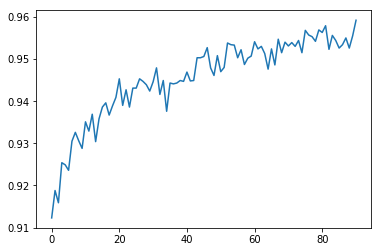

In [58]:
plt.plot(test_accuracy_history)
#plt.plot(test_loss_history)